# Chapter 1: EDA

- estimates of location: mean, p-trimmed mean, median
- estimates of variability
- exploring the distribution
- exploring binary and categorical data
- correlation and scatter plot
- exploring 2 or more variables

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# estimates of location: where is the data typically located
# is the estimator robust vs sensitive to outliers?

# mean is sum by count
mean = tips['tip'].sum() / tips['tip'].count()
# trimmed mean is the mean, ignoring the lowest and highest p percentiles
p = .10
n = len(tips['tip'])
from_index = int(n*p)
to_index = int(n*(1-p))
trimmed_mean = tips['tip'].sort_values().iloc[from_index:to_index].mean()
# weighted mean: weigh by inverse of party size 
weighted_mean = sum(tips['tip'] / tips['size']) / sum(1/tips['size'])
# median is 50th percentile value
median = tips['tip'].sort_values().iloc[n//2]

print(f'mean {mean:.2f}')
print(f'trimmed_mean {trimmed_mean:.2f}')
print(f'weighted_mean {weighted_mean:.2f}')
print(f'median {median:.2f}')


mean 3.00
trimmed_mean 2.83
weighted_mean 2.80
median 2.92


In [3]:
# estimates of variability (aka dispersion)
# is the data mostly all together, or widely spread?
# "At the heart of statistics lies variability: 
# measuring it, reducing it, distinguishing random from real variability, 
# identifying the various sources of real variability, 
# and making decisions in the presence of it."

# mean absolute deviation: mean of L1 distance from mean
mean_abs_dev = np.mean(
    np.abs(
        tips['tip'] - tips['tip'].mean()
    )
)

# standard deviation: sqrt of mean of L2 distance from mean
std_dev = np.sqrt(
    np.mean(
        np.square(
            tips['tip'] - tips['tip'].mean()
        )
    )
)

# taking mean is biased - dividing by n-1 is unbiased
# n-1, and not n is the degrees of freedom for SD, 
# since SD computation involves the mean
n = len(tips['tip'])
unbiased_std_dev = np.sqrt(std_dev**2 * n / (n-1))

# median abs dev: median of L1 distance from median
# robust against outliers, unlike SD
median_abs_dev = np.median(
    np.abs(
        tips['tip'] - np.median(tips['tip'])
    )
)

# interquarile range: difference between p25 and p75
low, high = np.percentile(tips['tip'], [25, 75])
interquartile_range = high - low

print(f'mean_abs_dev {mean_abs_dev:.3f}')
print(f'std_dev {std_dev:.3f}')
print(f'unbiased_std_dev {unbiased_std_dev:.3f}')
print(f'median_abs_dev {median_abs_dev:.3f}')
print(f'interquartile_range {interquartile_range:.3f}')

# mathematically: stdev > mean_abs_dev > median_abs_dev

mean_abs_dev 1.033
std_dev 1.381
unbiased_std_dev 1.384
median_abs_dev 0.900
interquartile_range 1.562


In [4]:
# exploring distribution of the data
# boxplot, frequency table, histogram, density plot

# describe
print('****description****\n', tips['tip'].describe())


****description****
 count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


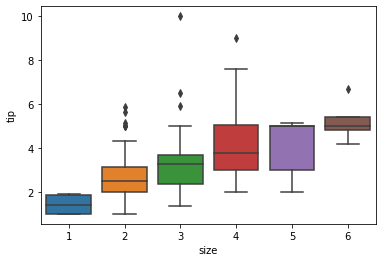

In [5]:
# boxplot 
#tips.boxplot('tip', by='size')
# fig, axs = plt.subplots(ncols=3)
sns.boxplot(x='size', y='tip', data=tips)


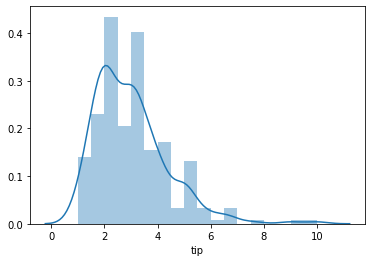

In [6]:
# histogram and density plot
sns.distplot(tips['tip'])


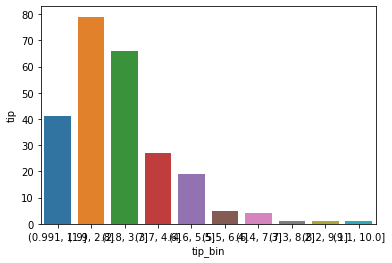

In [7]:
# bin then histogram of bins
tips['tip_bin'] = pd.cut(tips['tip'], 10)
binned_counts = tips.groupby('tip_bin').agg({'tip':'count'}).reset_index()
sns.barplot(x='tip_bin',y='tip', data=binned_counts)